# <font color = 'color'>모두의 딥러닝: 17장_컨볼루션신경망(CNN) 이용(p.220)</font>

# <font color = 'blue'>문제 정의</font>

### 미국국립표준기술연구소 손글씨 숫자이미지 데이터셋(MINST Dataset)
* 분류(classification) 문제
* 흑백 손글씨 숫자이미지 특성을 통해 숫자이미지를 분류예측하는 문제상황
* Modified National Institute of Standards and Technology database
* 총 7만개: 훈련용(6만개), 테스트용(1만개)

<img src = './../../images/mnist_cnn.png'>

1. 피처(입력/예측/독립)변수
    * 흑백 손글씨 숫자이미지 픽셀특성((가로28 X 세로28 픽셀별 색상정보) <pre>
1. 타깃(출력/반응/종속)변수
    * 10개의 숫자이미지 범주(0 ~ 9)

# <font color = 'blue'>데이터 준비</font>

### 시각화 모듈로딩 및 한글폰트 작업

In [1]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

In [2]:
# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 워닝메시지 출력관련 모듈로딩
import warnings

warnings.filterwarnings(action = 'ignore') 
# - 출력되는 경고메시지를 무시하고 숨김

# warnings.filterwarnings(action = 'default')
# - 다시 경고메시지가 나타나도록 함

### 관련 라이브러리 로딩

In [4]:
# 기본 범용라이브러리 로딩
import numpy as np
import pandas as pd

In [5]:
# 데이터셋 모듈에서 뉴스 주제분류 데이터셋 로딩
from keras.datasets import mnist

Using TensorFlow backend.


### (3) MNIST 데이터셋을 4개 객체로 로딩

In [6]:
# mnist에 들어 있는 데이터셋을 X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩함
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# - 원래 mnist데이터셋이 2개 요소를 가진 튜플로 구성된 형식이며,
#   각 요소별로 2개 서브요소를 가진 중첩 튜플 형식이라
#   로딩시 튜플로 받기 위해서 괄호()를 2번 사용함

### 훈련 MNIST 데이터셋

In [7]:
# 훈련 데이터셋 형식과 규모

print('훈련셋 숫자이미지(피처) 형식:', type(X_train), '규모:', X_train.shape)
# - 훈련셋 숫자이미지 픽셀특성(피처)은 다차원 배열형식임
# - 레코드 갯수는  6만개이며, 가로X세로 각각 28개 픽셀별 색상정보로 구성됨

print('훈련셋 숫자이름표(타겟) 형식:', type(y_train), '규모:', y_train.shape)
# - 훈련셋 숫자이름표(타겟) 범주는 다차원 배열형식임
# - 레코드 갯수는  6만개로 구성됨

훈련셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (60000, 28, 28)
훈련셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (60000,)


In [8]:
# 훈련 데이터셋 중 숫자이미지(피처) 조회
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### 테스트 MNIST 데이터셋

In [9]:
# 테스트 데이터셋 형식과 규모

print('테스트셋 숫자이미지(피처) 형식:', type(X_test), '규모:', X_test.shape)
# - 테스트셋 숫자이미지(피처) 형식은 다차원 배열형식임
# - 레코드 갯수는  1만개이며, 가로X세로 각각 28픽셀로 구성됨

print('테스트셋 숫자이름표(타겟) 형식:', type(y_test), '규모:', y_test.shape)
# - 테스트셋 숫자이름표(타겟) 형식은 다차원 배열형식임
# - 레코드 갯수는  6만개로 구성됨

테스트셋 숫자이미지(피처) 형식: <class 'numpy.ndarray'> 규모: (10000, 28, 28)
테스트셋 숫자이름표(타겟) 형식: <class 'numpy.ndarray'> 규모: (10000,)


In [10]:
# 테스트 데이터셋 중 숫자이미지(피처) 조회
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# <font color = 'blue'>데이터 탐색</font>

### 훈련 MNIST 데이터셋 조회

In [11]:
# 훈련 데이터셋 중 숫자이미지 픽셀특성(피처) 조회

X_train
# - mnist에 들어 있는 데이터셋을 
#   X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
# 훈련 데이터셋 중 숫자이름표 범주(타겟) 조회

y_train
# - mnist에 들어 있는 데이터셋을 
#   X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# 훈련 데이터셋 중 숫자이름표(타겟) 분포파악
y_tr_uq = np.unique(y_train)
print('훈련셋 숫자이름표(타겟) 유형:', y_tr_uq)

y_tr_bin = np.bincount(y_train)
print('훈련셋 숫자이름표(타겟) 유형별 빈도수:', y_tr_bin)

y_tr_por = [round(i / sum(y_tr_bin), 3) for i in y_tr_bin]
print('훈련셋 숫자이름표(타겟) 유형별 비율:', y_tr_por)

y_tr_tb = pd.DataFrame({'number': y_tr_uq, 
                        'frequency': y_tr_bin, 
                        'oportion': y_tr_por})
y_tr_tb

훈련셋 숫자이름표(타겟) 유형: [0 1 2 3 4 5 6 7 8 9]
훈련셋 숫자이름표(타겟) 유형별 빈도수: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
훈련셋 숫자이름표(타겟) 유형별 비율: [0.099, 0.112, 0.099, 0.102, 0.097, 0.09, 0.099, 0.104, 0.098, 0.099]


,number,frequency,oportion
0,0,5923,0.099
1,1,6742,0.112
2,2,5958,0.099
3,3,6131,0.102
4,4,5842,0.097
5,5,5421,0.090
6,6,5918,0.099
7,7,6265,0.104
8,8,5851,0.098
9,9,5949,0.099


### 테스트 MNIST 데이터셋 조회

In [14]:
# 테스트 데이터셋 중 숫자이미지 픽셀특성(피처) 조회

X_test
# - mnist에 들어 있는 데이터셋을 
#   X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
# 테스트 데이터셋 중 숫자이름표 범주(타겟) 조회

y_test
# - mnist에 들어 있는 데이터셋을 
#   X_train과 y_train, X_test, y_test라는 4개 객체로 분리해 로딩한 내용을 조회

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
# 테스트 데이터셋 중 숫자이름표(타겟) 분포파악
y_tt_uq = np.unique(y_test)
print('테스트셋 숫자이름표(타겟) 유형:', y_tt_uq)

y_tt_bin = np.bincount(y_test)
print('테스트셋 숫자이름표(타겟) 유형별 빈도수:', y_tt_bin)

y_tt_por = [round(i / sum(y_tt_bin), 3) for i in y_tt_bin]
print('테스트셋 숫자이름표(타겟) 유형별 비율:', y_tt_por)

y_tt_tb = pd.DataFrame({'number': y_tt_uq, 
                        'frequency': y_tt_bin, 
                        'oportion': y_tt_por})
y_tt_tb

테스트셋 숫자이름표(타겟) 유형: [0 1 2 3 4 5 6 7 8 9]
테스트셋 숫자이름표(타겟) 유형별 빈도수: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
테스트셋 숫자이름표(타겟) 유형별 비율: [0.098, 0.114, 0.103, 0.101, 0.098, 0.089, 0.096, 0.103, 0.097, 0.101]


,number,frequency,oportion
0,0,980,0.098
1,1,1135,0.114
2,2,1032,0.103
3,3,1010,0.101
4,4,982,0.098
5,5,892,0.089
6,6,958,0.096
7,7,1028,0.103
8,8,974,0.097
9,9,1009,0.101


### 숫자이미지(피처) 출력

In [17]:
# 훈련셋 중 첫번째 숫자이미지 내용출력
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, '숫자이미지의 픽셀분포 히스토그램')

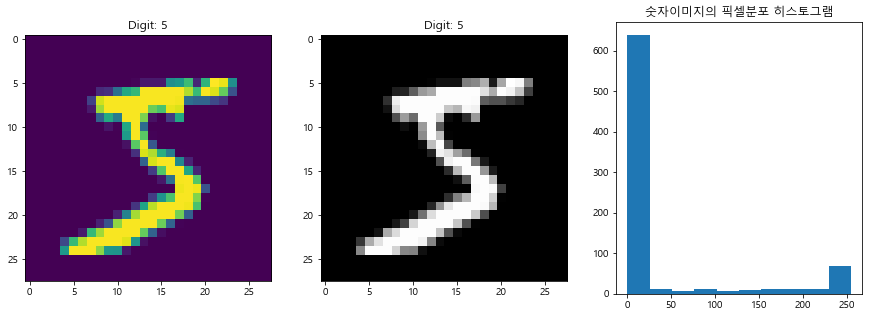

In [18]:
# 이미지 데이터 픽셀정보 분포파악
fig = plt.figure(figsize = (15, 5))

# - 가로28 X 세로28 = 총 784개 픽셀로 구성된 이미지파일을
#   각 픽셀별 밝기정도를 나타내는 수치로 인식함
# - 각 픽셀별로 밝기 정도에 따라 흰색:0 ~ 검정:255까지 숫자가 있음
# - 보통 글씨가 작성된 픽셀은 1~255 중에서 하나의 밝기 수치를 가짐

plt.subplot(1, 3, 1)
plt.imshow(X_train[0])
plt.title("Digit: {}".format(y_train[0]))

plt.subplot(1, 3, 2)
plt.imshow(X_train[0], cmap = 'gray', interpolation = 'none')
plt.title("Digit: {}".format(y_train[0]))

plt.subplot(1, 3, 3)
plt.hist(X_train[0].reshape(784))
plt.title("숫자이미지의 픽셀분포 히스토그램")

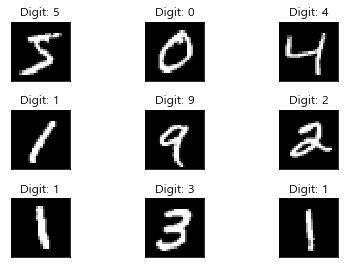

In [19]:
# 훈련셋 중 여러 개 숫자이미지 그래픽출력
fig = plt.figure()

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [20]:
# 이미지데이터를 가로28 X 세로28 = 768픽셀 구조형식으로 출력하기

for x in X_train[0]: # 전체내용 중 1개 행씩 로딩
    for i in x:      # 1개 행에 속한 세부 열 요소를 하나씩 로딩
        print('{:3} '.format(i), end = '') # 해당 픽셀의 밝기정도 수치를 출력
    print() # 1개 행 출력을 마치면 출력위치를 다음 행으로 이동

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

# <font color = 'blue'>데이터 전처리</font>

### 피처셋 구조변환: 숫자이미지의 2차원 배열데이터를 1차원 배열로 변환
* 숫자이미지 1개마다 (이미지갯수, 가로픽셀 , 세로픽셀)이라는 3차원 배열로 구성되어 있음
* 이중에서 이미지갯수는 개별 레코드/관찰치를 의미하므로 그대로 사용하면됨
* 각 이미지마다 가로28픽셀 X 세로28픽셀 구조의 2차원배열을 1차원 배열로 전환해서
<br>786개의 피처(입력/예측/독립)변수를 가진 개별 레코드/관찰치로 변환하는 것임

#### 숫자이미지(피처셋)의 2차원 픽셀배열을 1차원 배열로 변환

In [21]:
# 숫자이미지 픽셀특성(피처) 훈련셋 데이터 배열구조와 규모 확인

print('훈련셋 데이터 객체유형:', type(X_train))
print('훈련셋 데이터 구조규모:', X_train.shape)
print('훈련셋 레코드 갯수:', X_train.shape[0])
print('훈련셋 가로픽셀 갯수', X_train.shape[1])
print('훈련셋 세로픽셀 갯수', X_train.shape[2])

# - 훈련셋 레코드 개수 60000개는 그대로 사용하면 됨
# - 2차원 배열형태의 가로 28픽셀과 세로 28픽셀을 1차원으로 변환하여
#   28 X 28 = 784개 피처개수로 만들면 됨
# - 즉 (60000, 28, 28) 구조의 3차원 배열을 (60000, 784) 구조의 2차원 배열로 변환이 필요함

훈련셋 데이터 객체유형: <class 'numpy.ndarray'>
훈련셋 데이터 구조규모: (60000, 28, 28)
훈련셋 레코드 갯수: 60000
훈련셋 가로픽셀 갯수 28
훈련셋 세로픽셀 갯수 28


In [22]:
# reshape() 함수를 이용한 숫자이미지 픽셀특성(피처) 훈련셋 배열구조 변환

X_training = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

print('훈련셋 데이터 객체유형:', type(X_training))
print('훈련셋 데이터 구조규모:', X_training.shape)
print('훈련셋 레코드 갯수:', X_training.shape[0])
print('훈련셋 피처 갯수', X_training.shape[1])
print('\n훈련셋 피처 내용\n', X_training)

훈련셋 데이터 객체유형: <class 'numpy.ndarray'>
훈련셋 데이터 구조규모: (60000, 784)
훈련셋 레코드 갯수: 60000
훈련셋 피처 갯수 784

훈련셋 피처 내용
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
# 숫자이미지 픽셀특성(피처) 테스트셋 데이터 배열구조와 규모 확인

print('테스트셋 데이터 객체유형:', type(X_test))
print('테스트셋 데이터 구조규모:', X_test.shape)
print('테스트셋 레코드 갯수:', X_test.shape[0])
print('테스트셋 가로픽셀 갯수', X_test.shape[1])
print('테스트셋 세로픽셀 갯수', X_test.shape[2])

# - 테스트셋 레코드 개수 10000개는 그대로 사용하면 됨
# - 2차원 배열형태의 가로 28픽셀과 세로 28픽셀을 1차원으로 변환하여
#   28 X 28 = 784개 피처개수로 만들면 됨
# - 즉 (10000, 28, 28) 구조의 3차원 배열을 (10000, 784) 구조의 2차원 배열로 변환이 필요함

테스트셋 데이터 객체유형: <class 'numpy.ndarray'>
테스트셋 데이터 구조규모: (10000, 28, 28)
테스트셋 레코드 갯수: 10000
테스트셋 가로픽셀 갯수 28
테스트셋 세로픽셀 갯수 28


In [24]:
# reshape() 함수를 이용한 숫자이미지 픽셀특성(피처) 테스트셋 배열구조 변환

X_testing = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

print('테스트셋 데이터 객체유형:', type(X_testing))
print('테스트셋 데이터 구조규모:', X_testing.shape)
print('테스트셋 레코드 갯수:', X_testing.shape[0])
print('테스트셋 피처 갯수', X_testing.shape[1])
print('\n테스트셋 피처 내용\n', X_testing)

테스트셋 데이터 객체유형: <class 'numpy.ndarray'>
테스트셋 데이터 구조규모: (10000, 784)
테스트셋 레코드 갯수: 10000
테스트셋 피처 갯수 784

테스트셋 피처 내용
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 피처셋 스케일링: 숫자이미지의 색상밝기 수치를 스케일링 실시
* 각 숫자이미지가 가진 0~255까지의 색상밝기 수치를 0~1사이로 스케일링 필요
* 보통 딥러닝 신경망 기법에서는 피처데이터를 0~1사이로 스케일링 한 데이터인 경우 최적성능을 보임

#### 피처 스케일링: 숫자이미지의 0~255 색상밝기 수치를 0~1 사이로 변환
* sklearn라이브러리 preprocessing모듈의 minmax_scale() 함수를 이용해 최대/최소값이 각각 1, 0이 되도록 스케일링

In [25]:
from sklearn.preprocessing import minmax_scale

In [26]:
# 숫자이미지 피처 중 훈련셋 스케일링
X_training_scaled = minmax_scale(X_training)
print('스케일링된 훈련셋 구조:', X_training_scaled.shape)

# 숫자이미지 피처 중 테스트셋 스케일링
X_testing_scaled = minmax_scale(X_testing)
print('스케일링된 테스트셋 구조:', X_testing_scaled.shape)

스케일링된 훈련셋 구조: (60000, 784)
스케일링된 테스트셋 구조: (10000, 784)


#### 숫자이미지(피처셋)의 1차원 픽셀배열을 2차원 배열로 변환
* 컨벌루션 신경망(CNN: Convolution Neural Network) 신경망의 필터링 기능을 사용하기 위해서 
<br>가로X세로 2차원 픽셀구조로 다시 재변환하고, 색상채널정보도 같이 부여함
* (이미지레코드갯수, 가로픽셀, 세로픽셀, 색상채널)
* 색상채널: 흑백:1, 컬러:3

In [27]:
# reshape() 함수이용 숫자이미지 픽셀특성(피처)의 재구조화
# - reshape(레코드갯수, 가로픽셀, 세로픽셀, 색상채널) 내용으로 인수를 설정함
# - 색상채널은 1: 흑백이미지, 3: 컬러이미지

# 숫자이미지 피처 중 훈련셋 스케일링
X_training_28x28_scaled = X_training_scaled.reshape(X_training_scaled.shape[0], 28, 28, 1)
print('컨볼루션신경망용 스케일링된 훈련셋 구조 \n (레코드갯수, 가로픽셀, 세로픽셀, 색상채널):', X_training_28x28_scaled.shape)

# 숫자이미지 피처 중 테스트셋 스케일링
X_testing_28x28_scaled = X_testing_scaled.reshape(X_testing_scaled.shape[0], 28, 28, 1)
print('컨볼루션신경망용 스케일링된 테스트셋 구조 \n (레코드갯수, 가로픽셀, 세로픽셀, 색상채널)::', X_testing_28x28_scaled.shape)

컨볼루션신경망용 스케일링된 훈련셋 구조 
 (레코드갯수, 가로픽셀, 세로픽셀, 색상채널): (60000, 28, 28, 1)
컨볼루션신경망용 스케일링된 테스트셋 구조 
 (레코드갯수, 가로픽셀, 세로픽셀, 색상채널):: (10000, 28, 28, 1)


### 타겟변수 원핫인코딩: 숫자이름표를 0과 1로 구성된 더미변수화
* 타겟변수가 다항 클래스인 경우 원핫인코딩으로 변경해 0과 1로 구성된 상태로 만들어야 딥러닝 연산이 가능해짐

In [28]:
# 타겟(출력/반응/종속)변수의 다항클래스인 숫자이름표 범주 0~9까지를 0과 1로 구성된 이진데이터셋(더미변수화)으로 변형
from keras.utils import np_utils

In [29]:
# 숫자이름표 범주(타겟) 훈련셋 원핫인코딩
y_train_ohe = np_utils.to_categorical(y_train)
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
# 숫자이름표 범주(타겟) 테스트셋 원핫인코딩
y_test_ohe = np_utils.to_categorical(y_test)
y_test_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [31]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# - Dense: 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌
# - Dropout: 은닉층에 배치된 노두 중 일부를 임의로 비활성화 시킴
# - Flatten: 컨볼루션층이나 맥스풀링의 2차원(가로X세로) 배열을 1차원으로 바꾸어 주는 기능
# - Conv2D: 분석대상 이미지의 세부영역별 특징을 마스크 필터를 적용해 추출하는 기능
# - MaxPooling2D: 분석대상 이미지의 세부영역별 대표특징값을 추출하는 기능

#### 더깊은 딥러닝
* 이미지데이터를 구성하는 픽셀 하나하나를 일일이 비교분석 하는 것이 아니라 
<br>컨볼루션신경망과 맥스풀링을 통해 이미지데이터의 세부영역별 주요/대표 특징값 추출해 딥러닝 작업의 예측력을 높일 수 있음
<img src = './../../images/cnn_max.png'>

#### 컨볼루션신경망(CNN: Convolution Neural Net)
* 임의의 가중치 수치와 행렬차원을 가진 마스크 필터를 만들고, 
<br>이를 분석대상 이미지 데이터의 영역별로 적용(가중치를 곱해서 합함)하면 세부영역별 이미지의 주요특징을 파악할 수 있음
<img src = './../../images/cnn.png'>

* 가중치와 행렬차원이 다른 여러 개의 마스크 필터를 만들어 분석대상 이미지 데이터 영역별로 적용하게 되면, 
<br>세부 영역별 이미지 특징을 다양한 가중치로 파악한 컨볼루션(합성곱) 계층이 만들어지는 것임
* 입력된 이미지 데이터를 전체적으로 한 번에 비교하는 것이 아니라 
<br>컨볼루션(합성곱) 계층을 통해서 세부영역별로 주요특징을 비교함으로 이미지에 대한 인식률을 높일 수 있음 
<img src = './../../images/cnnlayer.png'>

#### 맥스풀링(Max Pooling; sub-sampling)
* 분석대상 이미지를 세부영역으로 분할한 다음 각 영역의 대표특징값(max)만 추출해주는 기법 
* 이미지의 사소한 변화나 불필요한 정보를 간추려 이미지를 구별하는 주요 특징을 보다 명확하게 찾아주는 효과가 있음
<img src = './../../images/maxpooling.png'>

#### 드롭아웃(Dropout)
* 은닉층에 배치된 노두 중 일부를 임의로 비활성화 시킴
* 과적합을 방지하기 위해서 학습 시에 지정된 비율만큼 임의의 입력 뉴런(1차원)을 신경망 연산에서 제외킴
<img src = './../../images/dropout.png'>

#### 플래튼(Flatten)
* 2차원의 특징맵을 Dense계층으로 전달하기 위해서 1차원 형식으로 바꿔줌
* 컨볼루션층이나 맥스풀링의 2차원(가로X세로) 배열을 1차원으로 바꾸어 주는 기능

#### 배열의 크기 변형
일단 만들어진 배열의 내부 데이터는 보존한 채로 형태만 바꾸려면 reshape 명령이나 메서드를 사용한다. <br>
예를 들어 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있다.

In [2]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

사용하는 원소의 갯수가 정해저 있기 때문에 reshape 명령의 형태 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있다. <br>
-1을 넣으면 해당 숫자는 다를 값에서 계산되어 사용된다.

In [6]:
a.reshape(3, -1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
a.reshape(2, 2, -1)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

다차원 배열을 무조건 1차원으로 펼치기 위해서는 flatten 나 ravel 메서드를 사용한다.

<hr>

### 랜덤 시드넘버 설정

In [32]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 딥러닝 모델계층 설정
* 입력층-하나의 은닉층-출력층을 가진 단순모델로 설정
<img src = './../../images/cnn_model.png'>

In [33]:
# 입력층-컨볼루션층-컨볼루션층-맥스풀링층-드롭아웃-플래튼-은닉층-출력층
md = Sequential()

# 컨볼루션층: 입력이미지크기
# input_demension이 아니라 차원가 있기 떄문에 kernel_size와 input_shape를 사용
md.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
md.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
md.add(MaxPooling2D(pool_size = 2))
md.add(Dropout(0.25))
md.add(Flatten()) # Flatten -> 가로 세로 구조로 평평하게 만들어달라.
md.add(Dense(128, activation = 'relu'))
md.add(Dropout(0.5))
md.add(Dense(10, activation = 'softmax'))

md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### 벡터이미지 형태로 신경망모델 설계내용 확인

In [ ]:
# 의사결정나무 그림을 출력해주는 GraphViz라는 프로그램이 
# - Jupyter Notebook과 연동해서 작동되도록 아래사항 실시

# 관련 프로그램 다운/설치
# - http://www.graphviz.org/에 접속 Download 메뉴에서
#   윈도우용 graphviz-2.38.msi 설치버전 다운로드후 PC에 직접설치

# 설치된 프로그램 경로설정
# - 제어판 > 시스템 > (왼쪽상단) 고급시스템설정 > 
#   (아래쪽) 환경변수 > (아래쪽) 시스템변수 목록중 "Path" 클릭 >
#   변수값 영역에 들어 있는 일련의 경로설정내역 제일오른쪽에 아래 경로 추가
# ==> ;C:\Program Files (x86)\Graphviz2.38\bin

# (주의) 
# - 경로시작시 이전 경로설정내역과 별도로 연결하기 위해 세미콜론기호( ; )로 시작해야 함
# - 경로끝에 \bin을 붙여주어야 함

# 파이선에서 관련 패키지 설치
# - 아나콘다 프롬프트창이나 노트북파워셀 창에서 
#   pip install graphviz pydotplus 구문실행
# - 또는 conda install -c conda-forge graphviz pydotplus 구문실행

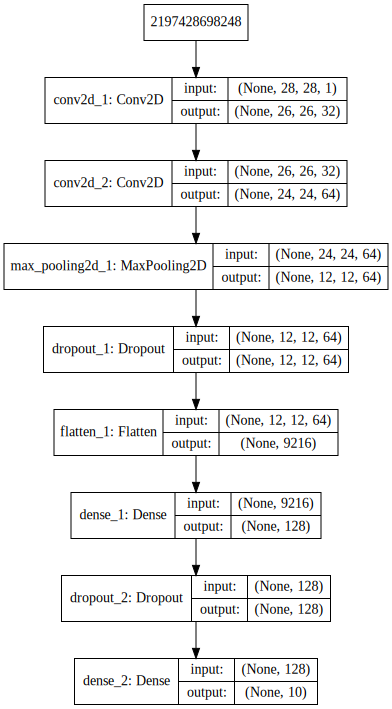

In [34]:
# 벡터이미지 형태로 신경망모델 설계내용 확인
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(md, show_shapes = True).create(prog = 'dot', format = 'svg'))

### 딥러닝 학습방법 설정

In [35]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])
# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 학습모델 파일저장 옵션 설정

In [36]:
# 딥러닝 학습모델 저장폴더명 설정
import os

md_dir = './model/'
if not os.path.exists(md_dir):
    os.mkdir(md_dir)
    
# 딥러닝 학습모델별 저장파일명 변경설정
md_path = './model/vloss{val_loss:.3f}_vacc{val_acc:.3f}_ep{epoch:d}.hdf5'
# - loss: 전체데이터 중 훈련셋(training) 학습오차
# - acc: 전체데이터 중 훈련셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ep{epoch:d} 단위배치(batch) 작업인 엑폭번호를 정수형으로 파일명 시작부분에 기록
# vloss{val_loss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3자리까지 파일에 기록
# vacc{val_acc:.3f} 각 학습모델의 검증데이터 정확정도를 소수3째자리까지 파일에 기록

### 학습모델 체크포인트 옵션 설정

In [37]:
# 학습모델 체크포인트 모듈 로딩
from keras.callbacks import ModelCheckpoint

In [38]:
# 체크포인트(checkpoint) 변경설정
cp = ModelCheckpoint(filepath = md_path, 
                     monitor = 'val_loss', 
                     verbose = 1, 
                     save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 훈련셋(training) 학습오차: loss
#   * 전체데이터 중 훈련셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 학습모델 과적합 방지 옵션 설정

In [39]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

In [40]:
# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 10)
# - monitor: 검증셋 대상 모니터할 값 설정
# - patience: 검증셋 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정

### 딥러닝 모델에 데이터 피팅

In [41]:
# 딥러닝 모델 최적화 훈련진행
md_hist = md.fit(X_training_28x28_scaled, y_train_ohe, 
                 epochs = 30, batch_size = 200, 
                 validation_split = 0.2, 
                 verbose = 1, 
                 callbacks = [cp, es])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 141s 3ms/step - loss: 0.3360 - acc: 0.8972 - val_loss: 0.0813 - val_acc: 0.9766

Epoch 00001: val_loss improved from inf to 0.08132, saving model to ./model/vloss0.081_vacc0.977_ep1.hdf5
Epoch 2/30
48000/48000 [==============================] - 136s 3ms/step - loss: 0.1058 - acc: 0.9688 - val_loss: 0.0506 - val_acc: 0.9849

Epoch 00002: val_loss improved from 0.08132 to 0.05061, saving model to ./model/vloss0.051_vacc0.985_ep2.hdf5
Epoch 3/30
48000/48000 [==============================] - 139s 3ms/step - loss: 0.0791 - acc: 0.9760 - val_loss: 0.0431 - val_acc: 0.9875

Epoch 00003: val_loss improved from 0.05061 to 0.04308, saving model to ./model/vloss0.043_vacc0.988_ep3.hdf5
Epoch 4/30
48000/48000 [==============================] - 165s 3ms/step - loss: 0.0616 - acc: 0.9815 - val_loss: 0.0376 - val_acc: 0.9892

Epoch 00004: val_loss improved from 0.04308 to 0.03758, saving model

# <font color = 'blue'>딥러닝 모델 성능평가</font>

### 딥러닝 학습모델 성능평가 히스토리

In [42]:
# 딥러닝 학습실시에 따른 성능평가 히스토리 확보

md_train_loss = md_hist.history['loss'] # 훈련셋 오차
md_train_acc = md_hist.history['acc'] # 훈련셋 정확도
md_valid_loss = md_hist.history['val_loss'] # 검증셋 오차
md_valid_acc = md_hist.history['val_acc'] # 검증셋 정확도

### 딥러닝 학습모델 성능평가 그래프

#### md모델 훈련셋과 검증셋 성능비교

In [43]:
# x축 설정
# - epochs = 200에 의해서 딥러닝 학습모델이 200개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 200개 값이 생성됨
# - 그런데, callbacks = [cp, es] 파라미터 설정으로 
#   개선된 베스트모델&과적합방지 학습모델에 대해서만 제한적으로  
#   학습오차, 학습정확도, 검증오차, 검증정확도가 기록됨  
#   [cp] 학습모델별 성능평가파일 생성시 
#        이전파일보다 성능이 개선된 베스트모델을 저장옵션
#   [es] 딥러닝 과적합방지용 조기종료 옵션 
md_x_len = np.arange(len(md_train_loss))
md_x_len

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

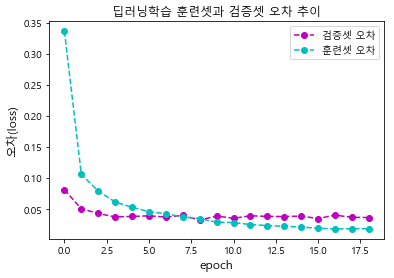

In [44]:
# 딥러닝학습 훈련셋과 검증셋 오차 추이
plt.plot(md_x_len, md_valid_loss, 'mo--', label = '검증셋 오차')
plt.plot(md_x_len, md_train_loss, 'co--', label = '훈련셋 오차')

plt.title('딥러닝학습 훈련셋과 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('오차(loss)', size = 12)
plt.legend()

# 마커설정 옵션 'co--', 'mo--'
# --> color = 'cyan', marker = 'o', linestyle = '--' 로 풀어서 코딩가능
# --> color = 'magenta', marker = 'o', linestyle = '--' 로 풀어서 코딩가능

여기서 값을 판정할 때, 어떠한 특정한 개별 이미지 데이터가 들어가면 각 레이블(0~9까지의 값) 중 어떤 레이블로 판정이 될지를 구하는 것.
이때, loss값은 특정 값이 각 레이블로 판정될 확률값을 다 제곱해서 더한 값을 의미(이때, 정답 레이블을 제외한 나머지 틀린 레이블의 확률값을 더한 것!)

epoch값이 7을 넘어서는 시점부터는 검증 데이터의 loss값이 더이상 개선이 안됨. <br>
그래서 7 이후의 검증셋과 훈련셋 오차의 gap이 과적합화될 가능성이 있다.

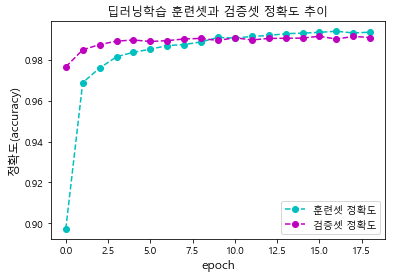

In [45]:
# 딥러닝학습 훈련셋과 검증셋 정확도 추이
plt.plot(md_x_len, md_train_acc, 'co--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_acc, 'mo--', label = '검증셋 정확도')

plt.title('딥러닝학습 훈련셋과 검증셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('정확도(accuracy)', size = 12)
plt.legend()

7 이상부터는 검증셋의 성능 개선이 안됨. -> 7까지가 가장 베스트모델이다.

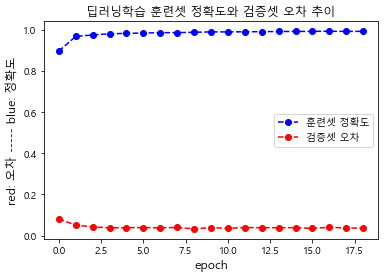

In [46]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(md_x_len, md_train_acc, color = 'blue', marker = 'o', 
         linestyle = '--', label = '훈련셋 정확도')
plt.plot(md_x_len, md_valid_loss, color = 'red', marker = 'o', 
         linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

### 모델 성능평가

#### md모델 훈련셋(train) 성능평가

In [62]:
# 훈련셋을 활용한 딥러닝모델의 성능평가 결과
md_train_perf = md.evaluate(X_training_28x28_scaled, y_train_ohe)
md_train_perf

60000/60000 [==============================] - 56s 939us/step


[0.00878428024011862, 0.9977833333333334]

In [63]:
print('훈련셋 모델성능 종합:', [round(i, 3) for i in md_train_perf])
print(f'훈련셋 모델성능 오차(loss): {md_train_perf[0]:11.3f}')
print(f'훈련셋 모델성능 정확도(accuracy): {md_train_perf[1]:0.3f}')

훈련셋 모델성능 종합: [0.009, 0.998]
훈련셋 모델성능 오차(loss):       0.009
훈련셋 모델성능 정확도(accuracy): 0.998


#### md모델 테스트셋(test) 성능평가

In [64]:
# 테스트셋을 활용한 딥러닝모델의 성능평가 결과
md_test_perf = md.evaluate(X_testing_28x28_scaled, y_test_ohe)
md_test_perf

10000/10000 [==============================] - 9s 850us/step


[0.032485895454938324, 0.9918]

In [65]:
print('테스트셋 모델성능 종합:', [round(i, 3) for i in md_test_perf])
print(f'테스트셋 모델성능 오차(loss): {md_test_perf[0]:11.3f}')
print(f'테스트셋 모델성능 정확도(accuracy): {md_test_perf[1]:0.3f}')

테스트셋 모델성능 종합: [0.032, 0.992]
테스트셋 모델성능 오차(loss):       0.032
테스트셋 모델성능 정확도(accuracy): 0.992


#### 훈련셋과 테스트셋 성능평가 비교

In [66]:
# 오차(loss) 비교
md_diff_loss = md_test_perf[0] - md_train_perf[0] 

# 정확도(accuracy) 비교
md_diff_acc = md_test_perf[1] - md_train_perf[1] 

print(f'[오차      (loss)] 훈련셋: {md_train_perf[0]:0.3f}, 테스트셋: {md_test_perf[0]:0.3f}, 차이: {md_diff_loss:6.3f}')
print(f'[정확도(accuracy)] 훈련셋: {md_train_perf[1]:0.3f}, 테스트셋: {md_test_perf[1]:0.3f}, 차이: {md_diff_acc:0.3f}')

[오차      (loss)] 훈련셋: 0.009, 테스트셋: 0.032, 차이:  0.024
[정확도(accuracy)] 훈련셋: 0.998, 테스트셋: 0.992, 차이: -0.006


### 혼동표 분석

#### 실제 테스트셋 y값과 모델에서 예측한 y추정치 비교

In [67]:
# 실제 테스트셋 숫자이름표
print('실제 테스트셋 숫자이름표:', y_test)

# 딥러닝모델의 예측 숫자이름표 
md_y_pred = md.predict_classes(X_testing_28x28_scaled)
print('md모델예측 숫자이름표:', md_y_pred)

실제 테스트셋 숫자이름표: [7 2 1 ... 4 5 6]
md모델예측 숫자이름표: [7 2 1 ... 4 5 6]


#### 혼동표 생성

In [68]:
# sklearn 성능평가 모듈 로딩
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [69]:
# 실제y값과 예측y값 간의 혼동표 생성
md_cm = confusion_matrix(y_test, md_y_pred)

print('md모델 혼동표:\n', md_cm)

md모델 혼동표:
 [[ 977    0    0    0    0    0    1    0    1    1]
 [   0 1130    2    2    0    0    0    1    0    0]
 [   1    2 1023    0    1    0    0    5    0    0]
 [   0    0    3 1005    0    1    0    0    1    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   1    0    0    7    0  881    2    1    0    0]
 [   3    2    0    1    2    4  944    0    2    0]
 [   0    1    5    0    0    0    0 1021    1    0]
 [   2    0    2    0    0    0    0    3  965    2]
 [   1    0    0    1    4    2    0    5    1  995]]


#### 혼동표 시각화

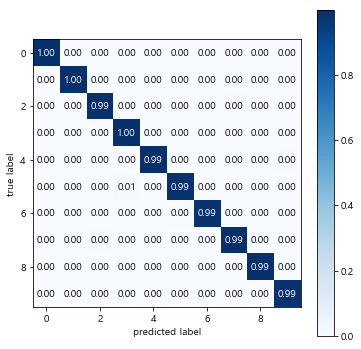

In [70]:
# 혼동표 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = md_cm,
                                colorbar = True,
                                show_absolute = False,
                                show_normed = True,
                                figsize = (6, 6))

In [71]:
# 혼동표 성능분석
print('md모델 혼동표 리포트:\n', 
      classification_report(y_test, md_y_pred,
                            target_names=['0', '1', '2', '3', '4', '5',
                                          '6', '7', '8', '9']))

md모델 혼동표 리포트:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### 정분류 & 오분류 샘플 확인

In [72]:
# 실제 테스트셋 숫자이름표
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [73]:
# 딥러닝모델의 예측 숫자이름표 
md_y_pred = md.predict_classes(X_testing_28x28_scaled)
md_y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [74]:
# 정분류된 숫자이름표, 오분류된 숫자이름표 확보
correct_indices = np.nonzero(md_y_pred == y_test)[0]
incorrect_indices = np.nonzero(md_y_pred != y_test)[0]
print()
print(f'정분류된 숫자이름표 갯수: {len(correct_indices):d}')
print(f'오분류된 숫자이름표 갯수: {len(incorrect_indices):4d}')


정분류된 숫자이름표 갯수: 9918
오분류된 숫자이름표 갯수:   82


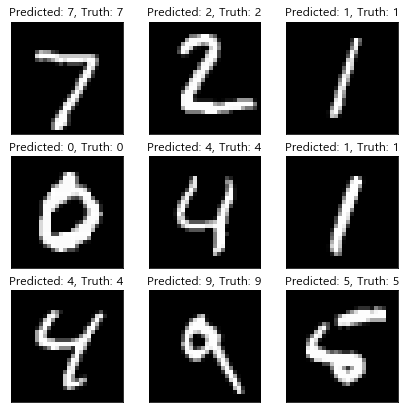

In [75]:
# 정분류된 9개 이미지 샘플 확인
fig = plt.figure(figsize = (7, 7))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_testing[correct].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title(
      "Predicted: {}, Truth: {}".format(md_y_pred[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

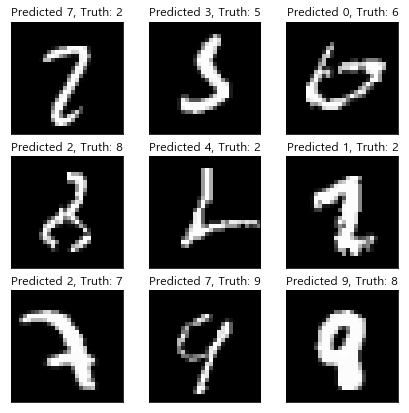

In [76]:
# 오분류된 9개 이미지 샘플 확인
fig = plt.figure(figsize = (7, 7))

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_testing[incorrect].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title(
      "Predicted {}, Truth: {}".format(md_y_pred[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

# End of Source